# Clustering using Zillow Data

In [3]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from env import host, user, password
import acquire
import summarize
import prepare

In [4]:
df = acquire.get_zillow_data()

In [5]:
df.unitcnt.value_counts(dropna=False)

1.0    33691
NaN    18451
2.0       26
3.0        1
Name: unitcnt, dtype: int64

In [6]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]

In [7]:
df.head()

,county,tax_rate,id,parcelid,airconditioningtypeid,airconditioningdesc,architecturalstyletypeid,architecturalstyledesc,basementsqft,bathroomcnt,...,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,typeconstructiontypeid,typeconstructiondesc,censustractandblock,transactiondate,logerror,transactions
0,Ventura,0.012225,1387261,17052889,NaN,None,NaN,None,NaN,1.0,...,376000.0,5672.48,None,NaN,NaN,None,6.111001e+13,2017-01-01,0.055619,1
1,Ventura,0.011133,43675,17110996,NaN,None,NaN,None,NaN,2.5,...,99028.0,2204.84,None,NaN,NaN,None,6.111005e+13,2017-01-02,0.008669,1
2,Ventura,0.010838,2490820,17134185,NaN,None,NaN,None,NaN,2.0,...,273509.0,4557.52,None,NaN,NaN,None,6.111006e+13,2017-01-03,0.057690,1
3,Ventura,0.018693,269618,17292247,NaN,None,NaN,None,NaN,2.0,...,24808.0,1450.06,None,NaN,NaN,None,6.111006e+13,2017-01-03,-0.421908,1
4,Ventura,0.010678,74982,17141654,NaN,None,NaN,None,NaN,3.0,...,126138.0,4139.18,None,NaN,NaN,None,6.111005e+13,2017-01-03,-0.021898,1


In [6]:
df.shape

(52169, 72)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tax_rate,52164.0,1.336932e-02,6.682133e-03,9.372442e-05,1.163577e-02,1.232550e-02,1.368476e-02,8.164900e-01
id,52169.0,1.496932e+06,8.594341e+05,3.490000e+02,7.577390e+05,1.500051e+06,2.241574e+06,2.982270e+06
parcelid,52169.0,1.298891e+07,3.214149e+06,1.071186e+07,1.150831e+07,1.257766e+07,1.412886e+07,1.676392e+08
airconditioningtypeid,13605.0,2.440647e+00,3.849141e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.300000e+01
architecturalstyletypeid,70.0,7.100000e+00,2.665670e+00,2.000000e+00,7.000000e+00,7.000000e+00,7.000000e+00,2.100000e+01
basementsqft,47.0,6.789787e+02,7.118252e+02,3.800000e+01,2.635000e+02,5.120000e+02,8.095000e+02,3.560000e+03
bathroomcnt,52169.0,2.305641e+00,1.017982e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01
bedroomcnt,52169.0,3.309475e+00,9.336865e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.400000e+01
buildingqualitytypeid,33628.0,6.265582e+00,1.715854e+00,1.000000e+00,5.000000e+00,6.000000e+00,8.000000e+00,1.200000e+01
calculatedbathnbr,52153.0,2.305658e+00,1.017997e+00,1.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,1.800000e+01


In [9]:
summarize.df_summary(df)

--- Shape: (52169, 72)
--- Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52169 entries, 0 to 52168
Data columns (total 72 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
parcelid                        52169 non-null int64
airconditioningtypeid           13605 non-null float64
airconditioningdesc             13605 non-null object
architecturalstyletypeid        70 non-null float64
architecturalstyledesc          70 non-null object
basementsqft                    47 non-null float64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null float64
buildingclasstypeid             0 non-null object
buildingclassdesc               0 non-null object
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
deckt

   num_cols_missing    pct_cols_missing  num_rows
0                23  31.944444444444443         2
1                24   33.33333333333333        12
2                25   34.72222222222222        11
3                26   36.11111111111111        30
4                27                37.5       177
5                28   38.88888888888889       389
6                29   40.27777777777778      2527
7                30   41.66666666666667      2194
8                31   43.05555555555556      5986
9                32   44.44444444444444      8880
10               33   45.83333333333333     11960
11               34   47.22222222222222     11151
12               35   48.61111111111111      3459
13               36                50.0      4121
14               37  51.388888888888886      1016
15               38   52.77777777777778       214
16               39  54.166666666666664        22
17               40   55.55555555555556        13
18               41   56.94444444444444         3


In [11]:
summarize.nulls_by_col(df)

,num_rows_missing,pct_rows_missing
county,0,0.000000
tax_rate,5,0.000096
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,38564,0.739213
airconditioningdesc,38564,0.739213
architecturalstyletypeid,52099,0.998658
architecturalstyledesc,52099,0.998658
basementsqft,52122,0.999099
bathroomcnt,0,0.000000


In [12]:
summarize.nulls_by_row(df)

,num_cols_missing,pct_cols_missing,num_rows
0,23,31.944444444444443,2
1,24,33.33333333333333,12
2,25,34.72222222222222,11
3,26,36.11111111111111,30
4,27,37.5,177
5,28,38.88888888888889,389
6,29,40.27777777777778,2527
7,30,41.66666666666667,2194
8,31,43.05555555555556,5986
9,32,44.44444444444444,8880


**This function deals with missing values in the columns and the rows. If a row has more than 50% nulls, they will be removed. If a columns has more than 75% nulls, they will be removed.**

In [9]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

After using this function, we didn't lose any rows, but we lost a lot of columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52169 entries, 0 to 52168
Data columns (total 38 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
parcelid                        52169 non-null int64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null float64
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
finishedsquarefeet12            52003 non-null float64
fips                            52169 non-null float64
state                           52169 non-null object
fullbathcnt                     52153 non-null float64
heatingorsystemtypeid           33824 non-null float64
heatingorsystemdesc             33824 non-null object
latitude                        52169 non-null float64
longitude         

The 'heatingorsystemtypeid', 'heatingorsystemdesc' and 'propertyzoningdesc' have significantly less values than the other values, but not so much so that they were removed with the function. We will just take note of this if we need to reference that leter on.

In [17]:
def df_feature_dist(df):
    features_num = list(df.select_dtypes(np.number).columns)
    for feature in features_num:
        sns.distplot(df[feature].dropna())
        plt.show()

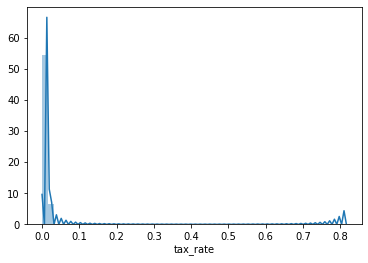

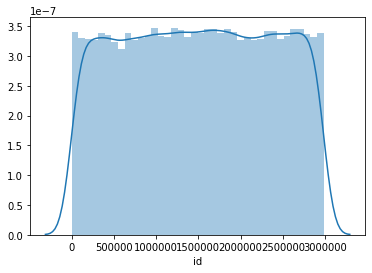

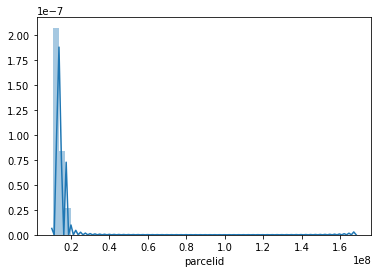

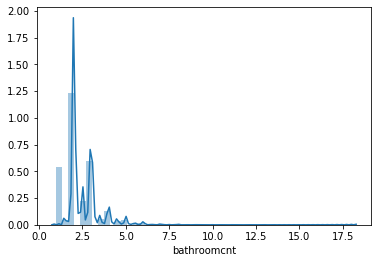

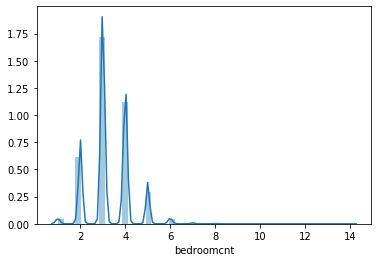

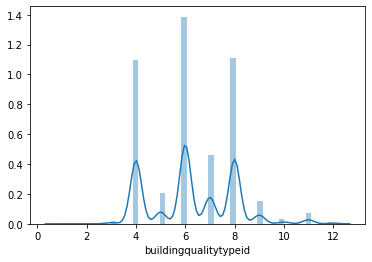

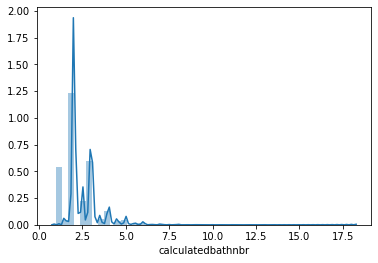

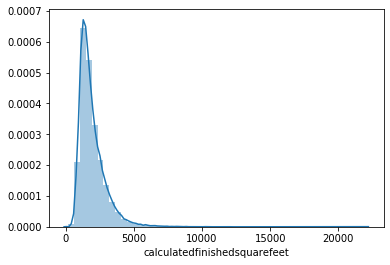

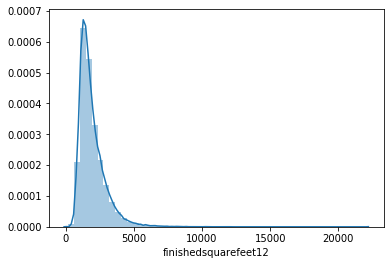

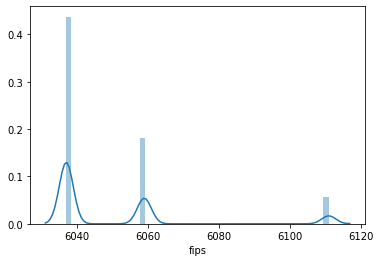

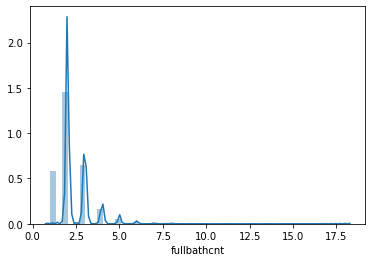

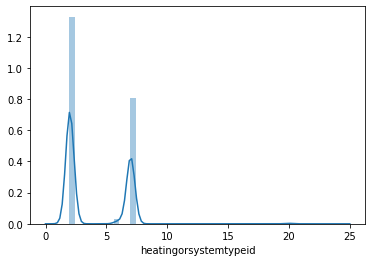

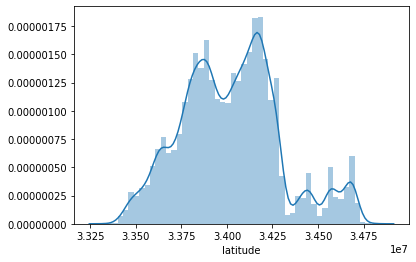

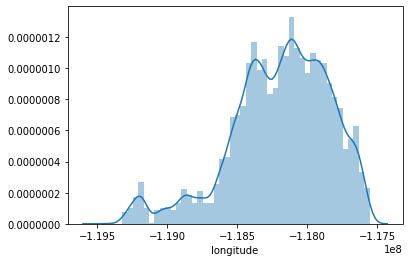

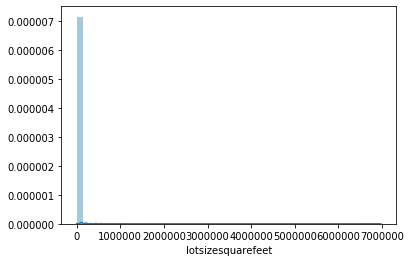

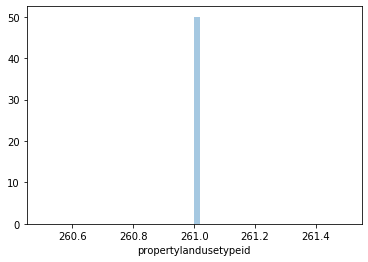

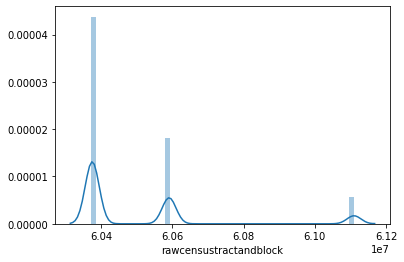

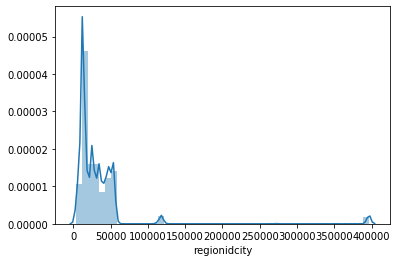

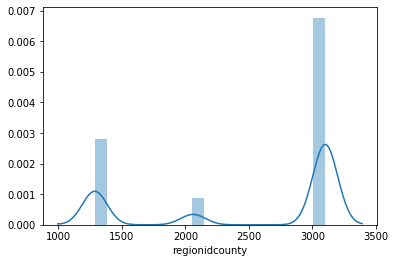

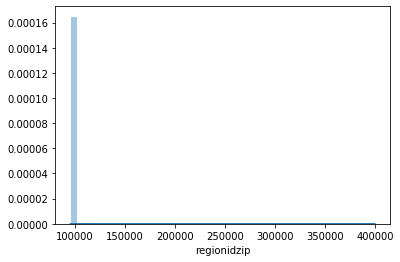

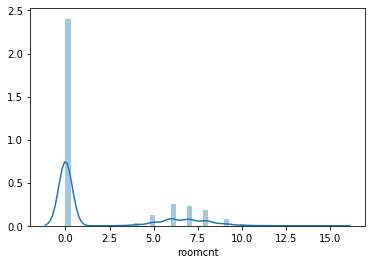

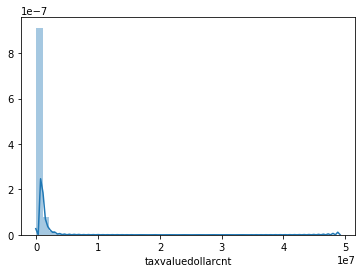

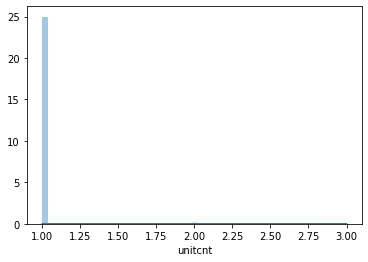

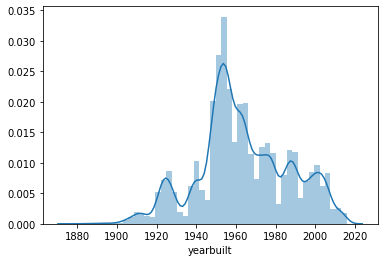

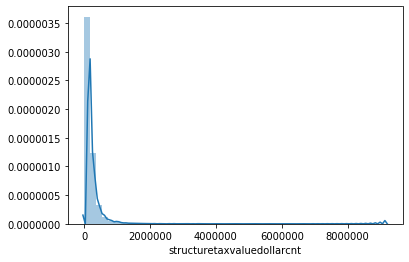

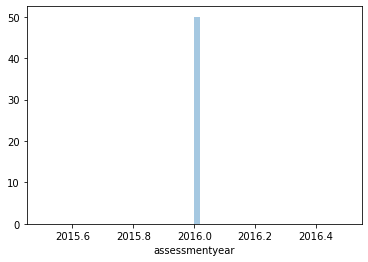

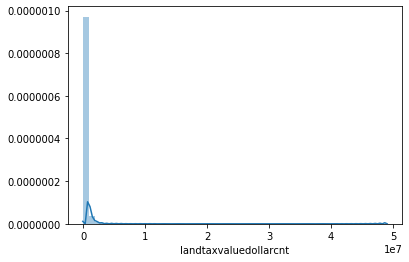

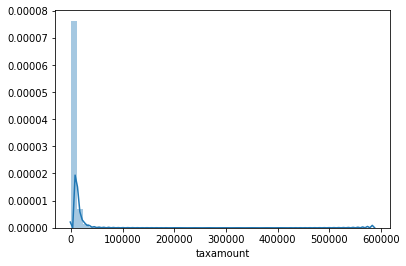

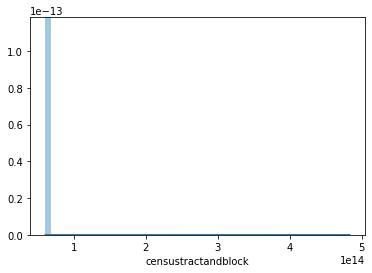

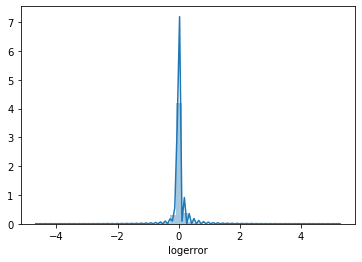

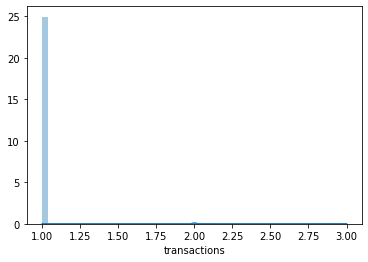

In [18]:
df_feature_dist(df)

In [24]:
def plot_box(features, target, df):
    '''
    plot_box(features, target, df):
    - iterates through dataframe columns and plots barcharts for all categorical columns
    args:
        features: list of string column names
        target: name of target variable column
        df: data frame containing feature and target columns
    '''
    # iterate through feature columns and select columns of object or integer type
    for column in df[features].select_dtypes([object, int, float]).columns.tolist():
        # check how many unique values column has, if over 5, we won't use column
        if len(df[column].unique()) <= 5:
            # build chart
            sns.boxplot(column, target, data=df)
            plt.show()

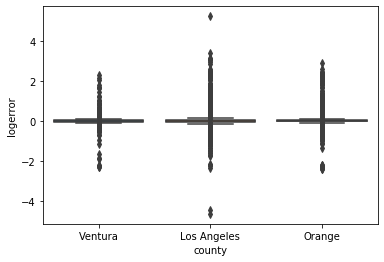

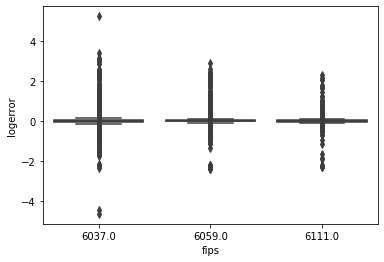

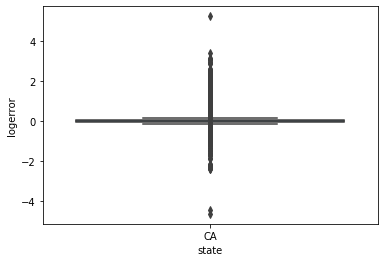

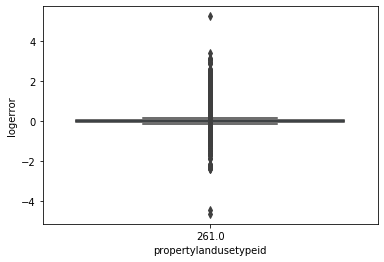

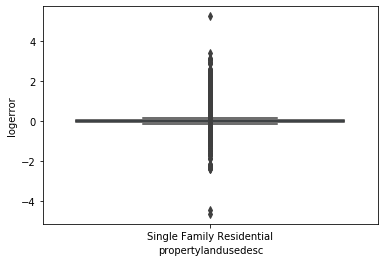

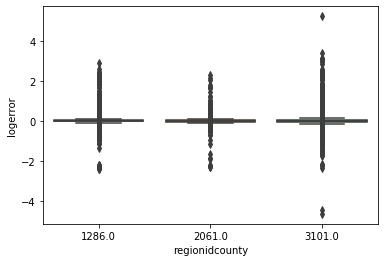

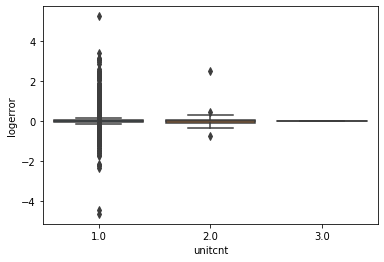

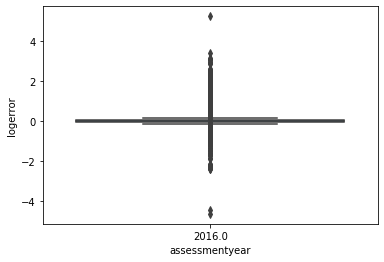

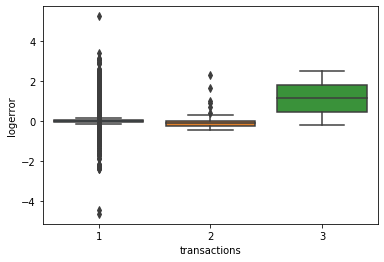

In [25]:
plot_box(df.columns, df.logerror, df)